In [1]:
pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/55/d5/0a1c65b13ab5a24178d162d0cfd3f8a709588388cc5bdd32b17c119f6d54/shap-0.44.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.0/446.0 kB 10.7 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
#importing packages
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests                                      # reading data
from io import StringIO

from sklearn.datasets import fetch_openml            # common data set access
from sklearn.preprocessing import StandardScaler     # scaling transform
from sklearn.model_selection import train_test_split # validation tools
from sklearn.metrics import zero_one_loss as J01
from sklearn.preprocessing import OneHotEncoder
import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import sklearn.tree as tree

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)  

In [6]:
pip install --upgrade imbalanced-learn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [21]:
Xtr = pd.read_csv("data/X_TRAINING_SET_Diabetes_ENCODED.csv")
Ytr = pd.read_csv("data/Y_TRAINING_SET.csv")
Xtr = Xtr.drop(columns=['Unnamed: 0','index','encounter_id','patient_nbr'])
                 
Xtest = pd.read_csv("data/X_VALIDATION_SET_ENCODED.csv")
Ytest = pd.read_csv("data/Y_VALIDATION_SET.csv")
Xtest = Xtest.drop(columns=['Unnamed: 0','index','encounter_id','patient_nbr'])



In [22]:
from imblearn.combine import SMOTE


ImportError: cannot import name 'SMOTE' from 'imblearn.combine' (C:\Users\diyac\anaconda3\Lib\site-packages\imblearn\combine\__init__.py)

In [23]:
Ytr['readmitted'] = Ytr['readmitted'].map({'<30': 1, 'NO': 0, '>30': 2})
Ytest['readmitted'] = Ytest ['readmitted'].map({'<30': 1, 'NO': 0, '>30': 2})


In [24]:
Ytr=Ytr.iloc[:,1:]

In [25]:
new_column_names = [col.replace('[', '_').replace(']', '_').replace('<', 'less_than') for col in Xtr.columns]
# Create a dictionary to map old names to new names
column_mapping = dict(zip(Xtr.columns, new_column_names))
Xtr = Xtr.rename(columns=column_mapping)
#--------
new_column_names = [col.replace('[', '_').replace(']', '_').replace('<', 'less_than') for col in Xtest.columns]
# Create a dictionary to map old names to new names
column_mapping = dict(zip(Xtest.columns, new_column_names))
Xtest = Xtest.rename(columns=column_mapping)

In [10]:
Ytr.to_csv('data/Y_TRAINING_SET_EDIT.csv', index=False)
Ytest.to_csv('data/Y_VALIDATION_SET_EDIT.csv', index=False)

In [142]:
from sklearn.ensemble import AdaBoostClassifier


cls = AdaBoostClassifier()

cls.fit(Xtr, Ytr)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


AdaBoostClassifier()

In [156]:
top_n_indices

array([ 11, 209, 208, 211, 193,  18, 195, 194, 140,   3, 210,  19,  29,
       162,  65,  14,  26, 192,   1,   0,   9,  25, 139,  28,  10])

In [157]:
features

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient',
       ...
       'glimepiride-pioglitazone_No', 'glimepiride-pioglitazone_Steady',
       'metformin-rosiglitazone_No', 'metformin-rosiglitazone_Steady',
       'metformin-pioglitazone_No', 'metformin-pioglitazone_Steady',
       'change_Ch', 'change_No', 'diabetesMed_No', 'diabetesMed_Yes'],
      dtype='object', length=210)

Top 25 Features:
discharge_disposition_id: 0.3600
number_inpatient: 0.1400
admission_source_id: 0.0400
num_medications: 0.0400
number_emergency: 0.0400
admission_type_id: 0.0200
metformin_No: 0.0200
payer_code_BC: 0.0200
medical_specialty_Emergency/Trauma: 0.0200
medical_specialty_Hematology: 0.0200
medical_specialty_Hematology/Oncology: 0.0200
medical_specialty_ObstetricsandGynecology: 0.0200
age__50-60): 0.0200
medical_specialty_Oncology: 0.0200
medical_specialty_Orthopedics-Reconstructive: 0.0200
medical_specialty_Pediatrics-Endocrinology: 0.0200
age__90-100): 0.0200
diabetesMed_No: 0.0200
number_diagnoses: 0.0200
insulin_Steady: 0.0200
num_lab_procedures: 0.0200
time_in_hospital: 0.0200
num_procedures: 0.0200
number_outpatient: 0.0200
medical_specialty_Gastroenterology: 0.0000


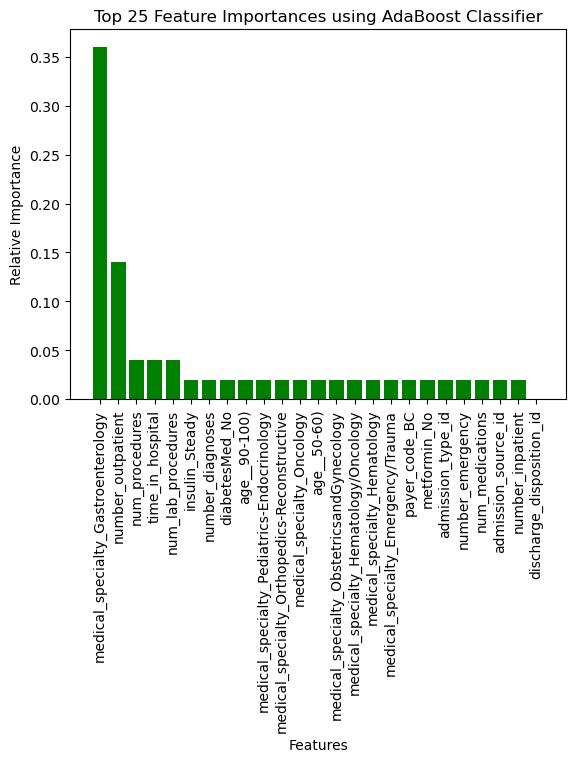

In [159]:
n = 25  # You can change this to the desired number of features
features = Xtr.columns

# Ensure that the number of features is not greater than the number of columns in Xtr
n = min(n, len(features))
importances = cls.feature_importances_
indices = np.argsort(importances)[::-1] 
top_n_indices = indices[:n]
top_n_features = [features[i] for i in top_n_indices]
top_n_importances = importances[top_n_indices]

# Print the top features with cleaned names
print(f'Top {n} Features:')
for feature, importance in zip(top_n_features, top_n_importances):
    print(f'{feature}: {importance:.4f}')

# Plot the bar chart for the top n importances with cleaned names
plt.title(f'Top {n} Feature Importances using AdaBoost Classifier')
plt.bar(range(len(top_n_indices)-1, -1, -1), top_n_importances[::-1], color='g', align='center')
plt.xticks(range(len(top_n_indices)), top_n_features[::-1], rotation='vertical')
plt.ylabel('Relative Importance')
plt.xlabel('Features')
plt.show()


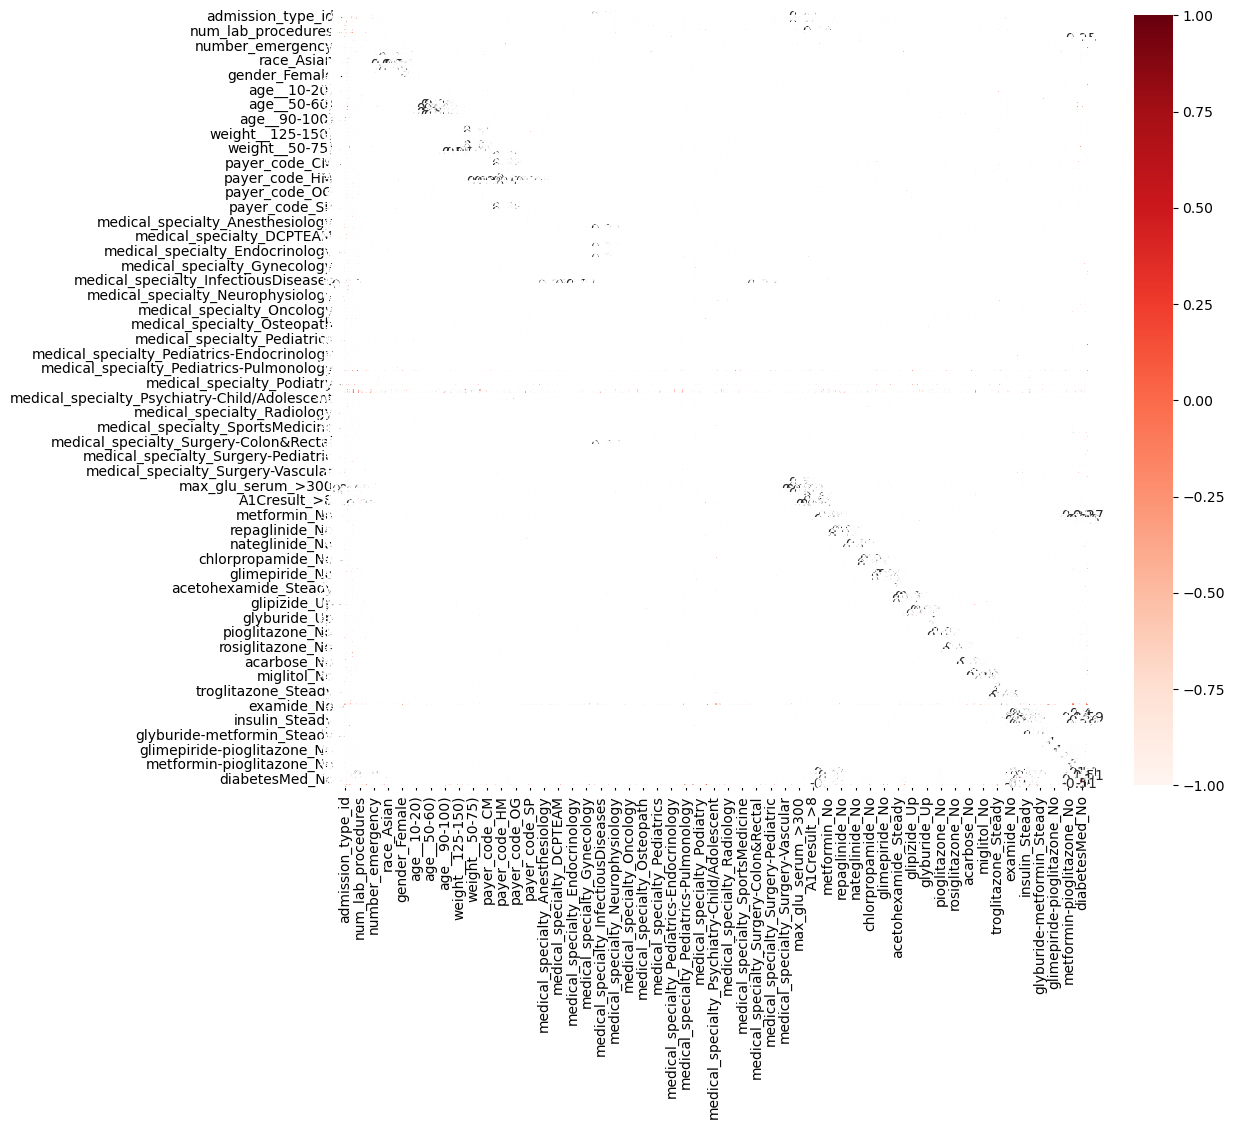

In [163]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = Xtr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [164]:
# Select only the top n features in Xtr
Xtr_top_n_adaboost = Xtr[top_n_features]



In [165]:
Xtr_top_n_adaboost

,discharge_disposition_id,number_inpatient,admission_source_id,num_medications,number_emergency,admission_type_id,metformin_No,payer_code_BC,medical_specialty_Emergency/Trauma,medical_specialty_Hematology,...,medical_specialty_Pediatrics-Endocrinology,age__90-100),diabetesMed_No,number_diagnoses,insulin_Steady,num_lab_procedures,time_in_hospital,num_procedures,number_outpatient,medical_specialty_Gastroenterology
0,1.0,0.0,7.0,13.0,0.0,1.0,1,0,0,0,...,0,0,0,3.0,0,37.0,3.0,1.0,0.0,0
1,14.0,2.0,7.0,10.0,0.0,1.0,1,0,0,0,...,0,1,1,6.0,0,57.0,3.0,0.0,0.0,0
2,6.0,0.0,1.0,11.0,0.0,2.0,1,0,0,0,...,0,0,0,9.0,0,71.0,4.0,0.0,0.0,0
3,1.0,0.0,7.0,6.0,0.0,1.0,1,0,0,0,...,0,0,1,5.0,0,29.0,1.0,0.0,0.0,0
4,1.0,0.0,7.0,18.0,0.0,1.0,1,0,0,0,...,0,0,0,4.0,0,49.0,10.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,6.0,1.0,7.0,22.0,0.0,1.0,1,0,1,0,...,0,0,0,9.0,0,72.0,9.0,4.0,0.0,0
71232,1.0,0.0,1.0,9.0,0.0,5.0,1,0,0,0,...,0,0,0,5.0,0,1.0,3.0,3.0,1.0,0
71233,1.0,0.0,4.0,23.0,0.0,2.0,1,0,0,0,...,0,0,0,9.0,1,14.0,5.0,4.0,0.0,0
71234,1.0,0.0,7.0,13.0,0.0,1.0,1,0,0,0,...,0,0,1,6.0,0,45.0,3.0,6.0,0.0,0


# Random Forest

In [166]:

cls=RandomForestClassifier()

In [167]:
Xtr.columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient',
       ...
       'glimepiride-pioglitazone_No', 'glimepiride-pioglitazone_Steady',
       'metformin-rosiglitazone_No', 'metformin-rosiglitazone_Steady',
       'metformin-pioglitazone_No', 'metformin-pioglitazone_Steady',
       'change_Ch', 'change_No', 'diabetesMed_No', 'diabetesMed_Yes'],
      dtype='object', length=210)

In [168]:
cls.fit(Xtr, Ytr)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier()

Top 25 Features:
num_lab_procedures: 0.1018
num_medications: 0.0915
time_in_hospital: 0.0701
number_diagnoses: 0.0472
number_inpatient: 0.0471
discharge_disposition_id: 0.0465
num_procedures: 0.0446
admission_type_id: 0.0290
admission_source_id: 0.0242
number_outpatient: 0.0211
gender_Male: 0.0168
gender_Female: 0.0168
number_emergency: 0.0164
age__70-80): 0.0157
medical_specialty_InternalMedicine: 0.0156
age__60-70): 0.0156
payer_code_MC: 0.0134
race_Caucasian: 0.0132
age__80-90): 0.0130
age__50-60): 0.0129
race_AfricanAmerican: 0.0122
A1Cresult_None: 0.0105
insulin_Steady: 0.0098
age__40-50): 0.0098
insulin_No: 0.0086


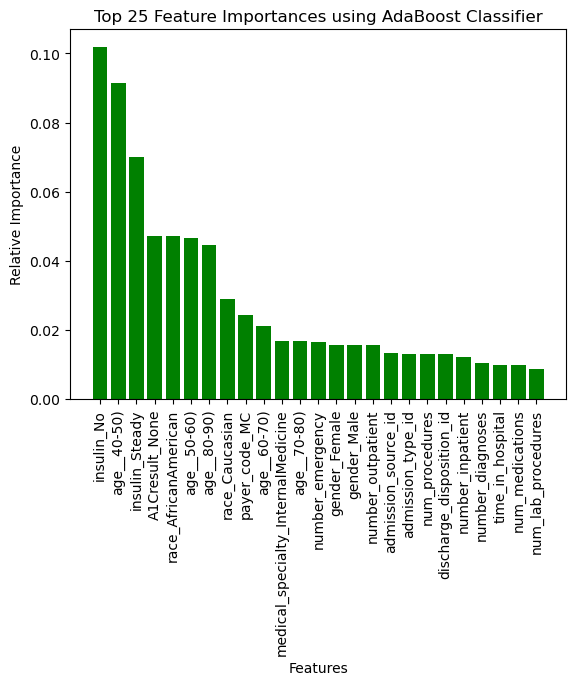

In [169]:
n = 25  # You can change this to the desired number of features
features = Xtr.columns

# Ensure that the number of features is not greater than the number of columns in Xtr
n = min(n, len(features))
importances = cls.feature_importances_
indices = np.argsort(importances)[::-1] 
top_n_indices = indices[:n]
top_n_features = [features[i] for i in top_n_indices]
top_n_importances = importances[top_n_indices]

# Print the top features with cleaned names
print(f'Top {n} Features:')
for feature, importance in zip(top_n_features, top_n_importances):
    print(f'{feature}: {importance:.4f}')

# Plot the bar chart for the top n importances with cleaned names
plt.title(f'Top {n} Feature Importances using AdaBoost Classifier')
plt.bar(range(len(top_n_indices)-1, -1, -1), top_n_importances[::-1], color='g', align='center')
plt.xticks(range(len(top_n_indices)), top_n_features[::-1], rotation='vertical')
plt.ylabel('Relative Importance')
plt.xlabel('Features')
plt.show()

Top 25 Features:
patient_nbr: 0.0812
encounter_id: 0.0738
number_inpatient: 0.0622
num_lab_procedures: 0.0550
num_medications: 0.0549
time_in_hospital: 0.0525
discharge_disposition_id: 0.0495
number_diagnoses: 0.0444
num_procedures: 0.0414
admission_source_id: 0.0335
admission_type_id: 0.0326
number_outpatient: 0.0253
number_emergency: 0.0197
insulin_Steady: 0.0155
gender_Male: 0.0143
gender_Female: 0.0140
insulin_No: 0.0129
medical_specialty_InternalMedicine: 0.0123
payer_code_MC: 0.0114
change_Ch: 0.0114
change_No: 0.0113
race_Caucasian: 0.0112
age_[70-80): 0.0109
A1Cresult_None: 0.0104
age_[50-60): 0.0099


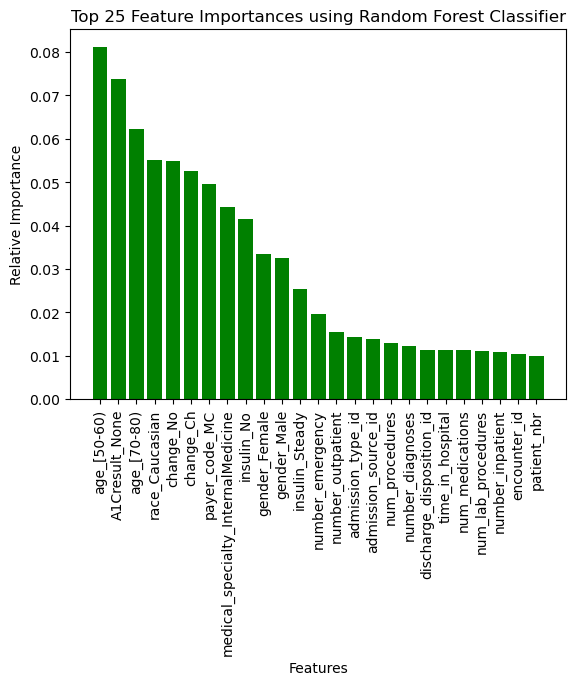

In [30]:
n = 25  # You can change this to the desired number of features
top_n_indices = indices[:n]
top_n_features = [features[i] for i in top_n_indices]
top_n_importances = importances[top_n_indices]

print(f'Top {n} Features:')
for feature, importance in zip(top_n_features, top_n_importances):
    print(f'{feature}: {importance:.4f}')
plt.title(f'Top {n} Feature Importances using Random Forest Classifier')
plt.bar(range(len(top_n_indices)-1, -1, -1), top_n_importances[::-1], color='g', align='center')
plt.xticks(range(len(top_n_indices)), [features[i] for i in top_n_indices[::-1]], rotation='vertical')
plt.ylabel('Relative Importance')
plt.xlabel('Features')
plt.show()


In [170]:
Xtr_top_n_rf = Xtr[top_n_features]


In [171]:
Xtr_top_n_rf

,num_lab_procedures,num_medications,time_in_hospital,number_diagnoses,number_inpatient,discharge_disposition_id,num_procedures,admission_type_id,admission_source_id,number_outpatient,...,age__60-70),payer_code_MC,race_Caucasian,age__80-90),age__50-60),race_AfricanAmerican,A1Cresult_None,insulin_Steady,age__40-50),insulin_No
0,37.0,13.0,3.0,3.0,0.0,1.0,1.0,1.0,7.0,0.0,...,0,0,0,0,0,1,1,0,0,0
1,57.0,10.0,3.0,6.0,2.0,14.0,0.0,1.0,7.0,0.0,...,0,1,0,0,0,1,1,0,0,1
2,71.0,11.0,4.0,9.0,0.0,6.0,0.0,2.0,1.0,0.0,...,0,1,1,1,0,0,1,0,0,1
3,29.0,6.0,1.0,5.0,0.0,1.0,0.0,1.0,7.0,0.0,...,0,1,1,1,0,0,1,0,0,1
4,49.0,18.0,10.0,4.0,0.0,1.0,1.0,1.0,7.0,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,72.0,22.0,9.0,9.0,1.0,6.0,4.0,1.0,7.0,0.0,...,0,1,1,1,0,0,1,0,0,1
71232,1.0,9.0,3.0,5.0,0.0,1.0,3.0,5.0,1.0,1.0,...,0,0,1,0,1,0,1,0,0,1
71233,14.0,23.0,5.0,9.0,0.0,1.0,4.0,2.0,4.0,0.0,...,0,1,1,1,0,0,1,1,0,0
71234,45.0,13.0,3.0,6.0,0.0,1.0,6.0,1.0,7.0,0.0,...,0,0,1,1,0,0,1,0,0,1


In [12]:
Xtr_top_n_xgb.columns

NameError: name 'Xtr_top_n_xgb' is not defined

# XGBoost

In [17]:
new_column_names = [col.replace('[', '_').replace(']', '_').replace('<', 'less_than') for col in Xtr.columns]
# Create a dictionary to map old names to new names
column_mapping = dict(zip(Xtr.columns, new_column_names))
Xtr = Xtr.rename(columns=column_mapping)
#--------
#new_column_names = [col.replace('[', '_').replace(']', '_').replace('<', 'less_than') for col in X_tr_bal.columns]
# Create a dictionary to map old names to new names
##column_mapping = dict(zip(X_test.columns, new_column_names))
#X_test = X_test.rename(columns=column_mapping)

In [20]:
Ytr

,Unnamed: 0,readmitted
0,47866,NO
1,24673,NO
2,61033,NO
3,74444,>30
4,56971,<30
...,...,...
71231,89460,NO
71232,60620,NO
71233,34086,NO
71234,58067,>30


Top 25 Features:
number_inpatient: 0.0658
discharge_disposition_id: 0.0256
diabetesMed_No: 0.0141
admission_source_id: 0.0140
weight__75-100): 0.0126
number_emergency: 0.0125
medical_specialty_ObstetricsandGynecology: 0.0120
medical_specialty_PhysicalMedicineandRehabilitation: 0.0115
number_diagnoses: 0.0113
age__90-100): 0.0109
number_outpatient: 0.0107
race_Asian: 0.0102
medical_specialty_Nephrology: 0.0100
age__70-80): 0.0098
payer_code_BC: 0.0094
medical_specialty_Orthopedics-Reconstructive: 0.0092
payer_code_OG: 0.0091
max_glu_serum_None: 0.0090
medical_specialty_Emergency/Trauma: 0.0090
race_Caucasian: 0.0089
weight__100-125): 0.0089
payer_code_SP: 0.0084
glyburide-metformin_No: 0.0084
medical_specialty_Surgery-Cardiovascular/Thoracic: 0.0082
medical_specialty_Surgery-Vascular: 0.0081


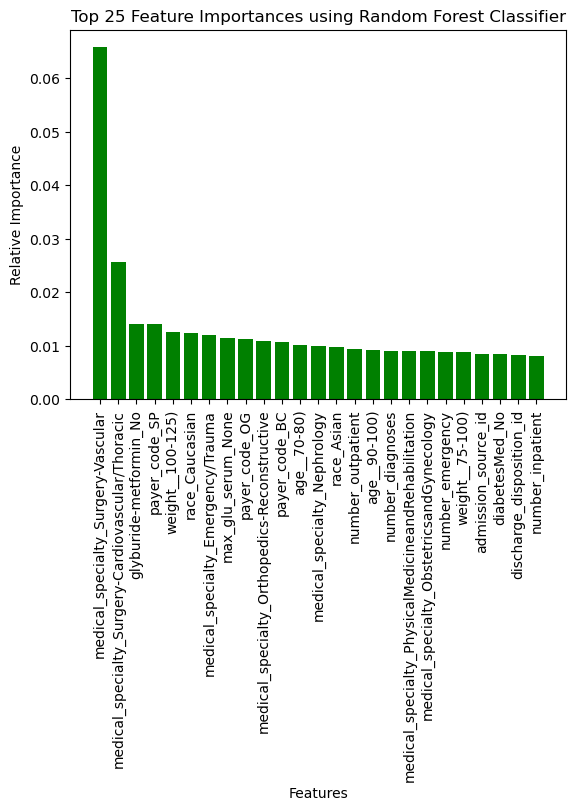

In [30]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Assuming X_tr_bal and y_tr_bal are your training data and labels

# Train the XGBoost Classifier
cls = XGBClassifier()
cls.fit(Xtr, Ytr)

# Get feature importances
importances = cls.feature_importances_
indices = np.argsort(importances)[::-1]
features = Xtr.columns

n = 25  # You can change this to the desired number of features
top_n_indices = indices[:n]
top_n_features = [features[i] for i in top_n_indices]
top_n_importances = importances[top_n_indices]

print(f'Top {n} Features:')
for feature, importance in zip(top_n_features, top_n_importances):
    print(f'{feature}: {importance:.4f}')
plt.title(f'Top {n} Feature Importances using Random Forest Classifier')
plt.bar(range(len(top_n_indices)-1, -1, -1), top_n_importances[::-1], color='g', align='center')
plt.xticks(range(len(top_n_indices)), [features[i] for i in top_n_indices[::-1]], rotation='vertical')
plt.ylabel('Relative Importance')
plt.xlabel('Features')
plt.show()

In [31]:
Xtr_top_n_xgb = Xtr[top_n_features]


In [32]:
Xtr_top_n_xgb.to_csv("data/Xtr_Feature_Selected_xgb.csv")

# Combination of Common Features

In [176]:
# Identify common columns
common_columns = list(set(Xtr_top_n_rf.columns) & set(Xtr_top_n_adaboost.columns) & set(Xtr_top_n_xgb.columns))

# Create a dataset with common columns
common_dataset = pd.concat([Xtr_top_n_rf[common_columns], Xtr_top_n_adaboost[common_columns], Xtr_top_n_xgb[common_columns]], axis=1)


In [178]:
common_dataset.to_csv('data/CommonBestFeatures.csv')

# Combination of All Features

In [179]:
combined_dataset = pd.concat([Xtr_top_n_rf, Xtr_top_n_adaboost, Xtr_top_n_xgb], axis=1)

combined_dataset = combined_dataset.loc[:,~combined_dataset.columns.duplicated()]


In [181]:
combined_dataset.to_csv('data/CombinedBestFeatures.csv')

# Experimentation on Neural Network

In [214]:
X_test = pd.read_csv('data/X_VALIDATION_SET_ENCODED.csv')
Y_tr = pd.read_csv('data/Y_TRAINING_SET_EDIT.csv')


In [228]:
y_test = pd.read_csv('data/Y_VALIDATION_SET_EDIT.csv')

In [215]:
X_test=X_test[X_tr.columns]

In [216]:
Y_tr=Y_tr.iloc[:,1:]

In [218]:
Y_tr = Y_tr.values.flatten()
Y_tr

array([0, 0, 0, ..., 0, 2, 2])

In [219]:
X_tr=common_dataset
X_tr

,number_diagnoses,number_outpatient,discharge_disposition_id,number_inpatient,admission_source_id,number_emergency,number_diagnoses,number_outpatient,discharge_disposition_id,number_inpatient,admission_source_id,number_emergency,number_diagnoses,number_outpatient,discharge_disposition_id,number_inpatient,admission_source_id,number_emergency
0,3.0,0.0,1.0,0.0,7.0,0.0,3.0,0.0,1.0,0.0,7.0,0.0,3.0,0.0,1.0,0.0,7.0,0.0
1,6.0,0.0,14.0,2.0,7.0,0.0,6.0,0.0,14.0,2.0,7.0,0.0,6.0,0.0,14.0,2.0,7.0,0.0
2,9.0,0.0,6.0,0.0,1.0,0.0,9.0,0.0,6.0,0.0,1.0,0.0,9.0,0.0,6.0,0.0,1.0,0.0
3,5.0,0.0,1.0,0.0,7.0,0.0,5.0,0.0,1.0,0.0,7.0,0.0,5.0,0.0,1.0,0.0,7.0,0.0
4,4.0,0.0,1.0,0.0,7.0,0.0,4.0,0.0,1.0,0.0,7.0,0.0,4.0,0.0,1.0,0.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,9.0,0.0,6.0,1.0,7.0,0.0,9.0,0.0,6.0,1.0,7.0,0.0,9.0,0.0,6.0,1.0,7.0,0.0
71232,5.0,1.0,1.0,0.0,1.0,0.0,5.0,1.0,1.0,0.0,1.0,0.0,5.0,1.0,1.0,0.0,1.0,0.0
71233,9.0,0.0,1.0,0.0,4.0,0.0,9.0,0.0,1.0,0.0,4.0,0.0,9.0,0.0,1.0,0.0,4.0,0.0
71234,6.0,0.0,1.0,0.0,7.0,0.0,6.0,0.0,1.0,0.0,7.0,0.0,6.0,0.0,1.0,0.0,7.0,0.0


In [247]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Standardize the data
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_tr)

#X_val_scaled = scaler.transform(X_test)

# Define the MLP model
model = Sequential()
model.add(Dense(128, input_dim=X_tr.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes

# Compile the model
# If Y_tr is one-hot encoded, use categorical_crossentropy
# If Y_tr is one-hot encoded, use categorical_crossentropy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_tr, Y_tr, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
#X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test)

# Print metrics and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Epoch 1/10
2227/2227 [==============================] - 1s 432us/step - loss: 0.9256 - accuracy: 0.5665 - val_loss: 0.9059 - val_accuracy: 0.5775
Epoch 2/10
2227/2227 [==============================] - 1s 403us/step - loss: 0.9039 - accuracy: 0.5730 - val_loss: 0.9000 - val_accuracy: 0.5727
Epoch 3/10
2227/2227 [==============================] - 1s 397us/step - loss: 0.8989 - accuracy: 0.5750 - val_loss: 0.8952 - val_accuracy: 0.5773
Epoch 4/10
2227/2227 [==============================] - 1s 395us/step - loss: 0.8961 - accuracy: 0.5761 - val_loss: 0.8956 - val_accuracy: 0.5817
Epoch 5/10
2227/2227 [==============================] - 1s 391us/step - loss: 0.8948 - accuracy: 0.5772 - val_loss: 0.8926 - val_accuracy: 0.5777
Epoch 6/10
2227/2227 [==============================] - 1s 383us/step - loss: 0.8941 - accuracy: 0.5765 - val_loss: 0.8974 - val_accuracy: 0.5750
Epoch 7/10
2227/2227 [==============================] - 1s 385us/step - loss: 0.8926 - accuracy: 0.5779 - val_loss: 0.8943 -

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [229]:
y_test

,Unnamed: 0,readmitted
0,60056,0
1,66252,0
2,71804,1
3,16676,0
4,25765,0
...,...,...
10069,91655,0
10070,28636,2
10071,101193,0
10072,94482,0


In [230]:
y_test=y_test.iloc[:,1:]


In [232]:
y_test=y_test.values

In [235]:
y_test=y_test.flatten()

In [241]:
y_test.shape

(10074,)

In [238]:
Y_tr

array([0, 0, 0, ..., 0, 2, 2])

In [239]:
X_test

,number_diagnoses,number_outpatient,discharge_disposition_id,number_inpatient,admission_source_id,number_emergency,number_diagnoses,number_outpatient,discharge_disposition_id,number_inpatient,admission_source_id,number_emergency,number_diagnoses,number_outpatient,discharge_disposition_id,number_inpatient,admission_source_id,number_emergency
0,9.0,0.0,1.0,0.0,7.0,0.0,9.0,0.0,1.0,0.0,7.0,0.0,9.0,0.0,1.0,0.0,7.0,0.0
1,6.0,0.0,1.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0,1.0,0.0
2,8.0,0.0,6.0,2.0,1.0,0.0,8.0,0.0,6.0,2.0,1.0,0.0,8.0,0.0,6.0,2.0,1.0,0.0
3,9.0,0.0,1.0,0.0,7.0,0.0,9.0,0.0,1.0,0.0,7.0,0.0,9.0,0.0,1.0,0.0,7.0,0.0
4,4.0,0.0,1.0,0.0,7.0,0.0,4.0,0.0,1.0,0.0,7.0,0.0,4.0,0.0,1.0,0.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10069,7.0,1.0,6.0,0.0,7.0,1.0,7.0,1.0,6.0,0.0,7.0,1.0,7.0,1.0,6.0,0.0,7.0,1.0
10070,6.0,0.0,1.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0,1.0,0.0
10071,9.0,0.0,1.0,1.0,7.0,0.0,9.0,0.0,1.0,1.0,7.0,0.0,9.0,0.0,1.0,1.0,7.0,0.0
10072,9.0,0.0,3.0,0.0,7.0,0.0,9.0,0.0,3.0,0.0,7.0,0.0,9.0,0.0,3.0,0.0,7.0,0.0


## PERFORMANCE OF MLP ON COMBINED FEATURE SET

In [253]:
X_tr=combined_dataset
X_test = pd.read_csv('data/X_VALIDATION_SET_ENCODED.csv')
X_test=X_test.iloc[:,1:]
X_test=X_test[X_tr.columns]
Y_tr = pd.read_csv('data/Y_TRAINING_SET_EDIT.csv')
y_test = pd.read_csv('data/Y_VALIDATION_SET_EDIT.csv')
Y_tr=Y_tr.iloc[:,1:]
Y_tr = Y_tr.values.flatten()
y_test=y_test.iloc[:,1:]
y_test=y_test.values
y_test=y_test.flatten()


KeyError: "['age__70-80)', 'age__60-70)', 'age__80-90)', 'age__50-60)', 'age__40-50)', 'age__90-100)', 'weight__75-100)', 'weight__100-125)'] not in index"

In [254]:
X_tr

,num_lab_procedures,num_medications,time_in_hospital,number_diagnoses,number_inpatient,discharge_disposition_id,num_procedures,admission_type_id,admission_source_id,number_outpatient,...,medical_specialty_PhysicalMedicineandRehabilitation,race_Asian,medical_specialty_Nephrology,payer_code_OG,max_glu_serum_None,weight__100-125),payer_code_SP,glyburide-metformin_No,medical_specialty_Surgery-Cardiovascular/Thoracic,medical_specialty_Surgery-Vascular
0,37.0,13.0,3.0,3.0,0.0,1.0,1.0,1.0,7.0,0.0,...,0,0,0,0,1,0,0,1,0,0
1,57.0,10.0,3.0,6.0,2.0,14.0,0.0,1.0,7.0,0.0,...,0,0,0,0,1,0,0,1,0,0
2,71.0,11.0,4.0,9.0,0.0,6.0,0.0,2.0,1.0,0.0,...,0,0,0,0,1,0,0,1,0,0
3,29.0,6.0,1.0,5.0,0.0,1.0,0.0,1.0,7.0,0.0,...,0,0,0,0,1,0,0,1,0,0
4,49.0,18.0,10.0,4.0,0.0,1.0,1.0,1.0,7.0,0.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,72.0,22.0,9.0,9.0,1.0,6.0,4.0,1.0,7.0,0.0,...,0,0,0,0,1,0,0,1,0,0
71232,1.0,9.0,3.0,5.0,0.0,1.0,3.0,5.0,1.0,1.0,...,0,0,0,0,1,0,0,1,0,0
71233,14.0,23.0,5.0,9.0,0.0,1.0,4.0,2.0,4.0,0.0,...,0,0,0,0,1,0,0,1,0,0
71234,45.0,13.0,3.0,6.0,0.0,1.0,6.0,1.0,7.0,0.0,...,0,0,0,0,1,0,0,1,0,0


In [257]:
X_test.columns

Index(['index', 'encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       ...
       'glimepiride-pioglitazone_No', 'glimepiride-pioglitazone_Steady',
       'metformin-rosiglitazone_No', 'metformin-rosiglitazone_Steady',
       'metformin-pioglitazone_No', 'metformin-pioglitazone_Steady',
       'change_Ch', 'change_No', 'diabetesMed_No', 'diabetesMed_Yes'],
      dtype='object', length=213)

# Voting Classifier

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

model1 = XGBClassifier()
model2 = RandomForestClassifier()
model3 = AdaBoostClassifier()
model4 = LinearDiscriminantAnalysis()

# Assuming you have defined model1, model2, model3, model4 previously
cls = VotingClassifier(estimators=[
    ('model1', model1),
    ('model2', model2),
    ('model3', model3)
], voting='soft')  # Adjust voting parameter as needed


In [117]:
new_column_names = [col.replace('[', '_').replace(']', '_').replace('<', 'less_than') for col in X_tr_bal.columns]
# Create a dictionary to map old names to new names
column_mapping = dict(zip(X_tr_bal.columns, new_column_names))
X_tr_bal = X_tr_bal.rename(columns=column_mapping)


In [62]:
cls.fit(X_tr_bal, y_tr_bal)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


VotingClassifier(estimators=[('model1',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning...max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('model2', RandomForestClassifier()),
                             ('model3', AdaBoostClassifier())],
                 voting='soft')

In [63]:
importances = cls.feature_importances_
indices = np.argsort(importances)[::-1]  # Reverse the order to get descending importance
features = X_tr_bal.columns

n = 5  # You can change this to the desired number of features
top_n_indices = indices[:n]
top_n_features = [features[i] for i in top_n_indices]
top_n_importances = importances[top_n_indices]

print(f'Top {n} Features:')
for feature, importance in zip(top_n_features, top_n_importances):
    print(f'{feature}: {importance:.4f}')

# Plot the bar chart
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


AttributeError: 'VotingClassifier' object has no attribute 'feature_importances_'